<a href="https://colab.research.google.com/github/ZinnurovArtur/Colour-Mathcer/blob/main/color_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np 
import cv2
from collections import Counter
from skimage.color import rgb2lab,deltaE_cie76

import os
%matplotlib inline


In [22]:
from google.colab import drive
from keras.datasets import fashion_mnist

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Type of image<class 'numpy.ndarray'>


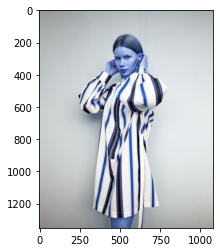

In [23]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/datasets/pictures_outfit/bauman/baumundpferdgarten_106915056_600072320905456_1611934786290419901_n.jpg')
print("Type of image{}".format(type(image)))

plt.imshow(image)

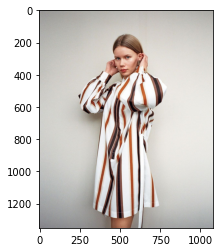

In [24]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)



In [25]:
#Rgb to hext conversion
def rgbTohex(color):
  return "#{:02x}{:02x}{:02x}".format(int(color[0]),int(color[1]), int(color[2]))

In [27]:
def get_image(image_path):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  return image

In [28]:
def get_colors(image,numCol, chart):
  clf = KMeans(n_clusters= numCol)
  new_image = cv2.resize(image,(600,400),interpolation = cv2.INTER_AREA)
  new_image = new_image.reshape(new_image.shape[0]*new_image.shape[1],3)

  labels = clf.fit_predict(new_image)
  counts = Counter(labels)
  counts = dict(sorted(counts.items()))

  center_colors = clf.cluster_centers_
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [rgbTohex(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  if(chart):
    plt.figure(figsize = (10,10))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
  
  return rgb_colors




[array([120.77076099,  84.42102872,  72.72721077]),
 array([210.05475536, 207.72849392, 203.37081531])]

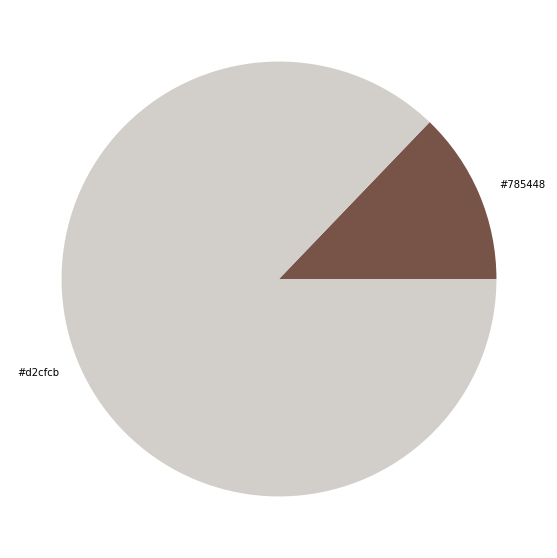

In [29]:
get_colors(get_image('/content/drive/MyDrive/Colab Notebooks/datasets/pictures_outfit/bauman/baumundpferdgarten_106915056_600072320905456_1611934786290419901_n.jpg'),2,True)